In [1]:
# The following code includes Random forest
# best parameters are identified using grid search with cross validation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir("C:\Digital Nest\Decision Trees")
print (os.getcwd())

C:\Digital Nest\Decision Trees


In [3]:
churn = pd.read_csv('Churn.csv')
churn.head()

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntlPlan,VMailPlan,...,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,State,AreaCode,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [4]:
churn.shape

(3333, 21)

In [5]:
# target class ratio
np.unique(churn.Churn,return_counts=True)

(array([0, 1], dtype=int64), array([2850,  483], dtype=int64))

In [6]:
2850/(2850+483)

0.8550855085508551

In [7]:
churn.columns.values

array(['AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
       'IntlMins', 'CustServCalls', 'Churn', 'IntlPlan', 'VMailPlan',
       'DayCalls', 'DayCharge', 'EveCalls', 'EveCharge', 'NightCalls',
       'NightCharge', 'IntlCalls', 'IntlCharge', 'State', 'AreaCode',
       'Phone'], dtype=object)

In [8]:
# check if any NA values
churn.isnull().values.any()

False

In [9]:
# split the file into Independent and dependent variables
churnY = pd.DataFrame(churn,columns=['Churn'])
print(churnY.shape)
churnX = churn.copy()
churnX.drop(columns=['Churn','Phone'],axis=1,inplace=True)
print(churnX.shape)

(3333, 1)
(3333, 19)


In [10]:
# splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(churnX, churnY, 
                                                    test_size = 0.20, 
                                                    random_state = 0)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2666, 19)
(2666, 1)
(667, 19)
(667, 1)


In [11]:
np.unique(churn.AreaCode,return_counts=True)

(array([408, 415, 510], dtype=int64), array([ 838, 1655,  840], dtype=int64))

In [12]:
np.unique(churn.State,return_counts=True)

(array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
        'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object),
 array([ 52,  80,  55,  64,  34,  66,  74,  54,  61,  63,  54,  53,  44,
         73,  58,  71,  70,  59,  51,  65,  70,  62,  73,  84,  63,  65,
         68,  68,  62,  61,  56,  68,  62,  66,  83,  78,  61,  78,  45,
         65,  60,  60,  53,  72,  72,  77,  73,  66,  78, 106,  77],
       dtype=int64))

In [13]:
# lable encoding for strings - state
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train.State = le.fit_transform(X_train.State)
X_test.State = le.transform(X_test.State)
np.unique(X_train.State,return_counts=True)

C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\pandas\core\generic.py:5292: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 array([45, 63, 47, 48, 27, 49, 59, 43, 52, 51, 47, 45, 38, 58, 46, 51, 62,
        45, 41, 54, 50, 50, 59, 69, 51, 51, 60, 54, 48, 53, 48, 51, 51, 50,
        63, 62, 52, 62, 37, 50, 49, 48, 44, 50, 55, 62, 52, 54, 62, 82, 66],
       dtype=int64))

In [14]:
# split the Train data into Categorical and non-categorical
catcols = ['State', 'AreaCode']
X_train_cat = pd.DataFrame(X_train, columns=catcols)
print(X_train_cat.shape)
X_train_cont = X_train.copy()
X_train_cont.drop(columns=['State', 'AreaCode'],axis=1,inplace=True)
print(X_train_cont.shape)
X_train_cont.reset_index(drop=True,inplace=True)

(2666, 2)
(2666, 17)


In [15]:
# split the Test data into Categorical and non-categorical
X_test_cat = pd.DataFrame(X_test, columns=catcols)
print(X_test_cat.shape)
X_test_cont = X_test.copy()
print(X_test_cont.columns)
X_test_cont.drop(columns=['State', 'AreaCode'],axis=1,inplace=True)
print(X_test_cont.shape)
X_test_cont.reset_index(drop=True,inplace=True)

(667, 2)
Index(['AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
       'IntlMins', 'CustServCalls', 'IntlPlan', 'VMailPlan', 'DayCalls',
       'DayCharge', 'EveCalls', 'EveCharge', 'NightCalls', 'NightCharge',
       'IntlCalls', 'IntlCharge', 'State', 'AreaCode'],
      dtype='object')
(667, 17)


In [16]:
# apply one hot encoding on state and area
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse = False, handle_unknown = 'error')
X_train_cat2 = OHE.fit_transform(X_train_cat)
print(X_train_cat2.shape)
X_test_cat2 = OHE.transform(X_test_cat)
print(X_test_cat2.shape)

(2666, 54)
(667, 54)


In [17]:
# convert back array into data frame
X_train_cat3 = pd.DataFrame(X_train_cat2)
print(X_train_cat3.shape)
X_test_cat3 = pd.DataFrame(X_test_cat2)
print(X_test_cat3.shape)

(2666, 54)
(667, 54)


In [18]:
# merge continuous and onehotencoded categorical data
X_train_final = pd.concat([X_train_cont,X_train_cat3],axis=1,join='outer',ignore_index=False)
X_test_final = pd.concat([X_test_cont,X_test_cat3],axis=1,join='outer',ignore_index=False)
print(X_train_final.shape)
print(X_test_final.shape)

(2666, 71)
(667, 71)


In [19]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=0, class_weight='balanced')
# build grid search parameters
parms = { 'max_depth': [3,4,5],
          'max_features' : [0.3,0.6,0.9],
          'n_estimators' : [10,20,30],
          'bootstrap':[True, False]} 
# perform grid search
from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(estimator = RF,param_grid = parms, scoring = 'f1_macro',
                  cv=3, refit=True,return_train_score = True,
                  verbose=10)
CV.fit(X_train_final,Y_train.Churn)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] bootstrap=True, max_depth=3, max_features=0.3, n_estimators=10 ..
[CV]  bootstrap=True, max_depth=3, max_features=0.3, n_estimators=10, score=(train=0.791, test=0.763), total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=0.3, n_estimators=10 ..
[CV]  bootstrap=True, max_depth=3, max_features=0.3, n_estimators=10, score=(train=0.814, test=0.765), total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=0.3, n_estimators=10 ..


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, max_depth=3, max_features=0.3, n_estimators=10, score=(train=0.800, test=0.788), total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=0.3, n_estimators=20 ..
[CV]  bootstrap=True, max_depth=3, max_features=0.3, n_estimators=20, score=(train=0.807, test=0.791), total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=0.3, n_estimators=20 ..


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


[CV]  bootstrap=True, max_depth=3, max_features=0.3, n_estimators=20, score=(train=0.817, test=0.768), total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=0.3, n_estimators=20 ..
[CV]  bootstrap=True, max_depth=3, max_features=0.3, n_estimators=20, score=(train=0.814, test=0.792), total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=0.3, n_estimators=30 ..


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s


[CV]  bootstrap=True, max_depth=3, max_features=0.3, n_estimators=30, score=(train=0.804, test=0.773), total=   0.2s
[CV] bootstrap=True, max_depth=3, max_features=0.3, n_estimators=30 ..
[CV]  bootstrap=True, max_depth=3, max_features=0.3, n_estimators=30, score=(train=0.820, test=0.779), total=   0.2s
[CV] bootstrap=True, max_depth=3, max_features=0.3, n_estimators=30 ..


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.0s remaining:    0.0s


[CV]  bootstrap=True, max_depth=3, max_features=0.3, n_estimators=30, score=(train=0.804, test=0.794), total=   0.2s
[CV] bootstrap=True, max_depth=3, max_features=0.6, n_estimators=10 ..
[CV]  bootstrap=True, max_depth=3, max_features=0.6, n_estimators=10, score=(train=0.800, test=0.772), total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=0.6, n_estimators=10 ..


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.2s remaining:    0.0s


[CV]  bootstrap=True, max_depth=3, max_features=0.6, n_estimators=10, score=(train=0.776, test=0.772), total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=0.6, n_estimators=10 ..
[CV]  bootstrap=True, max_depth=3, max_features=0.6, n_estimators=10, score=(train=0.796, test=0.776), total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=0.6, n_estimators=20 ..
[CV]  bootstrap=True, max_depth=3, max_features=0.6, n_estimators=20, score=(train=0.770, test=0.753), total=   0.2s
[CV] bootstrap=True, max_depth=3, max_features=0.6, n_estimators=20 ..
[CV]  bootstrap=True, max_depth=3, max_features=0.6, n_estimators=20, score=(train=0.779, test=0.776), total=   0.2s
[CV] bootstrap=True, max_depth=3, max_features=0.6, n_estimators=20 ..
[CV]  bootstrap=True, max_depth=3, max_features=0.6, n_estimators=20, score=(train=0.784, test=0.767), total=   0.2s
[CV] bootstrap=True, max_depth=3, max_features=0.6, n_estimators=30 ..
[CV]  bootstrap=True, max_depth=3, max_features=0.6, n_estim

[CV]  bootstrap=True, max_depth=5, max_features=0.3, n_estimators=10, score=(train=0.884, test=0.817), total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=0.3, n_estimators=10 ..
[CV]  bootstrap=True, max_depth=5, max_features=0.3, n_estimators=10, score=(train=0.873, test=0.841), total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=0.3, n_estimators=20 ..
[CV]  bootstrap=True, max_depth=5, max_features=0.3, n_estimators=20, score=(train=0.861, test=0.808), total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=0.3, n_estimators=20 ..
[CV]  bootstrap=True, max_depth=5, max_features=0.3, n_estimators=20, score=(train=0.907, test=0.836), total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=0.3, n_estimators=20 ..
[CV]  bootstrap=True, max_depth=5, max_features=0.3, n_estimators=20, score=(train=0.895, test=0.853), total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=0.3, n_estimators=30 ..
[CV]  bootstrap=True, max_depth=5, max_features=0.3, n_estim

[CV]  bootstrap=False, max_depth=3, max_features=0.9, n_estimators=10, score=(train=0.760, test=0.738), total=   0.2s
[CV] bootstrap=False, max_depth=3, max_features=0.9, n_estimators=10 .
[CV]  bootstrap=False, max_depth=3, max_features=0.9, n_estimators=10, score=(train=0.758, test=0.746), total=   0.2s
[CV] bootstrap=False, max_depth=3, max_features=0.9, n_estimators=10 .
[CV]  bootstrap=False, max_depth=3, max_features=0.9, n_estimators=10, score=(train=0.779, test=0.776), total=   0.2s
[CV] bootstrap=False, max_depth=3, max_features=0.9, n_estimators=20 .
[CV]  bootstrap=False, max_depth=3, max_features=0.9, n_estimators=20, score=(train=0.760, test=0.738), total=   0.3s
[CV] bootstrap=False, max_depth=3, max_features=0.9, n_estimators=20 .
[CV]  bootstrap=False, max_depth=3, max_features=0.9, n_estimators=20, score=(train=0.758, test=0.746), total=   0.3s
[CV] bootstrap=False, max_depth=3, max_features=0.9, n_estimators=20 .
[CV]  bootstrap=False, max_depth=3, max_features=0.9, n

[CV]  bootstrap=False, max_depth=5, max_features=0.3, n_estimators=30, score=(train=0.865, test=0.839), total=   0.3s
[CV] bootstrap=False, max_depth=5, max_features=0.6, n_estimators=10 .
[CV]  bootstrap=False, max_depth=5, max_features=0.6, n_estimators=10, score=(train=0.893, test=0.844), total=   0.2s
[CV] bootstrap=False, max_depth=5, max_features=0.6, n_estimators=10 .
[CV]  bootstrap=False, max_depth=5, max_features=0.6, n_estimators=10, score=(train=0.913, test=0.840), total=   0.2s
[CV] bootstrap=False, max_depth=5, max_features=0.6, n_estimators=10 .
[CV]  bootstrap=False, max_depth=5, max_features=0.6, n_estimators=10, score=(train=0.850, test=0.834), total=   0.2s
[CV] bootstrap=False, max_depth=5, max_features=0.6, n_estimators=20 .
[CV]  bootstrap=False, max_depth=5, max_features=0.6, n_estimators=20, score=(train=0.896, test=0.846), total=   0.3s
[CV] bootstrap=False, max_depth=5, max_features=0.6, n_estimators=20 .
[CV]  bootstrap=False, max_depth=5, max_features=0.6, n

[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:   42.9s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                             

In [20]:
# check the results
CVResults = pd.DataFrame(CV.cv_results_)
CVResults.to_excel('CVResutls_RF1.xlsx')

In [21]:
print(CV.best_score_)
print(CV.best_params_)

0.8581402281850751
{'bootstrap': True, 'max_depth': 5, 'max_features': 0.6, 'n_estimators': 20}


In [22]:
print(CV.best_estimator_.feature_importances_)

[6.46404815e-03 3.62524948e-02 1.66987871e-01 3.45040724e-02
 1.34557183e-02 1.61196092e-02 2.47380523e-01 1.63309058e-01
 1.66271141e-02 5.44879364e-03 1.52297359e-01 5.27413083e-03
 4.29962355e-02 5.92607078e-03 1.48937148e-02 2.66623947e-02
 2.99643361e-02 0.00000000e+00 1.28469062e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.56977887e-04
 0.00000000e+00 5.18480781e-04 0.00000000e+00 0.00000000e+00
 2.93523452e-05 0.00000000e+00 0.00000000e+00 2.80426139e-04
 0.00000000e+00 2.16595754e-04 0.00000000e+00 0.00000000e+00
 5.95215506e-04 2.15830996e-04 0.00000000e+00 0.00000000e+00
 2.90621788e-04 0.00000000e+00 1.06337265e-03 1.33285076e-03
 0.00000000e+00 6.15159713e-04 0.00000000e+00 8.74562254e-04
 2.63926272e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.08361380e-03 0.00000000e+00 0.00000000e+00 3.07599700e-04
 1.28412725e-04 5.11325517e-04 0.00000000e+00 0.00000000e+00
 2.21608767e-03 3.97382302e-04 3.42358470e-04 0.00000000e+00
 0.00000000e+00 0.000000

In [23]:
for model in CV.best_estimator_.estimators_:
    print(model.predict(X_test_final[0:1]))
print("final Prediction: ", CV.best_estimator_.predict(X_test_final[0:1]))

[1.]
[1.]
[1.]
[0.]
[0.]
[1.]
[1.]
[0.]
[1.]
[1.]
[0.]
[0.]
[1.]
[1.]
[1.]
[1.]
[0.]
[0.]
[1.]
[0.]
final Prediction:  [1]


In [24]:
predict = np.zeros([1,2])
for model in CV.best_estimator_.estimators_:
    predict = np.vstack((predict,model.predict_proba(X_test_final[0:1])))
predict = predict[1:]
print(predict)
print("average: ",np.mean(predict,axis=0))
print("final Prediction: ", 
      CV.best_estimator_.predict_proba(X_test_final[0:1]))

[[0.01179572 0.98820428]
 [0.09804895 0.90195105]
 [0.19097178 0.80902822]
 [0.83454757 0.16545243]
 [0.86858399 0.13141601]
 [0.36113651 0.63886349]
 [0.32173984 0.67826016]
 [0.89100595 0.10899405]
 [0.11050806 0.88949194]
 [0.02457123 0.97542877]
 [0.5208608  0.4791392 ]
 [0.91986874 0.08013126]
 [0.02149806 0.97850194]
 [0.01502793 0.98497207]
 [0.04822923 0.95177077]
 [0.06829404 0.93170596]
 [0.81149225 0.18850775]
 [1.         0.        ]
 [0.39793213 0.60206787]
 [0.84355194 0.15644806]]
average:  [0.41798324 0.58201676]
final Prediction:  [[0.41798324 0.58201676]]


In [25]:
# Preidct on Test data and check the confusion matrix
predictProb = CV.predict_proba(X_test_final)
print(predictProb[0:5])
PProb = pd.DataFrame(predictProb,columns=["class0","class1"])
predictTest = CV.predict(X_test_final)
print(predictTest[0:5])

[[0.41798324 0.58201676]
 [0.88001385 0.11998615]
 [0.89605103 0.10394897]
 [0.87260339 0.12739661]
 [0.06184158 0.93815842]]
[1 0 0 0 1]


In [26]:
# generate confusion matrix
# import confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
print (confusion_matrix(Y_test,predictTest))
print (classification_report(Y_test,predictTest))

[[543  36]
 [ 16  72]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       579
           1       0.67      0.82      0.73        88

    accuracy                           0.92       667
   macro avg       0.82      0.88      0.84       667
weighted avg       0.93      0.92      0.93       667



In [27]:
# generate ROC curve
from sklearn.metrics import roc_auc_score, roc_curve
# AUC for class 1
AUC = roc_auc_score(Y_test, PProb.class1)
print(AUC)

0.9013090752080389


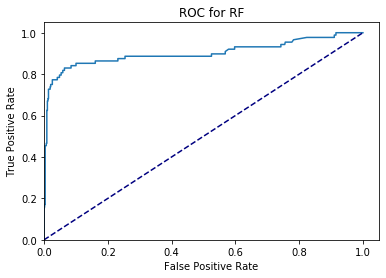

In [29]:
FPR, TPR, THR = roc_curve(Y_test, PProb.class1)
# plot the FPR as X-axis and TPR as Y-axis
plt.plot(FPR, TPR)
# plot the minimum line 
plt.plot([0,1], [0,1], color='navy', linestyle = '--')
# set X and Y limits
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
# mention lables for X and Y
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for RF')
plt.show()

In [30]:
ROC = pd.DataFrame({"THR":THR,
                   "TPR":TPR,
                   "FPR":FPR})
ROC.to_excel('ROC_RF.xlsx')

In [32]:
pclass = list()
for prob in PProb.class1:
    if prob >= 0.5525:
        pclass.append(1)
    else:
        pclass.append(0)
print(PProb.class1.head())
print(pclass[0:5])

0    0.582017
1    0.119986
2    0.103949
3    0.127397
4    0.938158
Name: class1, dtype: float64
[1, 0, 0, 0, 1]


In [33]:
print (confusion_matrix(Y_test,pclass))
print (classification_report(Y_test,pclass))

[[551  28]
 [ 18  70]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       579
           1       0.71      0.80      0.75        88

    accuracy                           0.93       667
   macro avg       0.84      0.87      0.86       667
weighted avg       0.93      0.93      0.93       667



In [34]:
testcomp = pd.read_excel('testcomp.xlsx')
testcomp.head()

,Unnamed: 0,Actuals,DTPred,BagPred
0,405,0,1,1
1,118,0,0,0
2,710,0,0,0
3,499,0,0,0
4,2594,1,1,1


In [35]:
testcomp["RFPred"] = predictTest
testcomp.to_excel('testcomp.xlsx',index=False)